<a href="https://colab.research.google.com/github/ParisaSaat/ENSF619/blob/master/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #01

This assignment is composed of 4 tasks that your teams is supposed to propose a solution to these tasks that uses  the max-tree. The deliverable for this assignment is:

1. This jupyter-notebook completed with your solution. 
    - Create a GitHub repository and create a folder assignment-01. Put the jupyter-notebook with your solution in this repository and send the instructor the link. The same repository that your team created will be used for submitting the other assignments and your team final project.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 40% 
4. Quality of the results - 20%

More details about the assessment are available in the rubric document in the class GitHub repository.

In [6]:
! git clone https://github.com/rmsouza01/ENSF619.2.git
! git clone https://github.com/rmsouza01/siamxt.git; cd siamxt; python setup.py install

remote: Total 129 (delta 46), reused 100 (delta 21), pack-reused 0
Receiving objects: 100% (129/129), 30.11 MiB | 274.00 KiB/s, done.
Resolving deltas: 100% (46/46), done.
Cloning into 'siamxt'...
remote: Enumerating objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218g objects:  21% (47/218), 1.39 MiB | 295.00 KiB/sReceiving objects:  22% (50/218), 1.57 MiB | 204.00 KiB/sReceiving objects:  24% (53/218), 1.79 MiB | 186.00 KiB/sReceiving objects:  32% (70/218), 1.79 MiB | 186.00 KiB/sReceiving objects:  40% (88/218), 1.79 MiB | 186.00 KiB/sReceiving objects:  77% (168/218), 1.79 MiB | 186.00 KiB/sReceiving objects:  82% (180/218), 2.18 MiB | 197.00 KiB/sReceiving objects:  82% (180/218), 2.43 MiB | 200.00 KiB/sReceiving objects:  82% (180/218), 2.69 MiB | 163.00 KiB/sReceiving objects:  82% (180/218), 2.83 MiB | 115.00 KiB/sReceiving objects:  82% (180/218), 3.05 MiB | 104.00 KiB/sReceiving objects:  84% (184/218), 3.17 MiB | 96.00 KiB/sReceiving objects

In [1]:
import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import siamxt  

**Part 1)** Using the max tree area signature analysis, determined CCs in the max tree
that separate Mona Lisa’s face from the background

(317, 213)


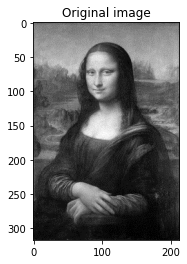

Text(0.5, 1.0, 'Reconstruction at h = 85')

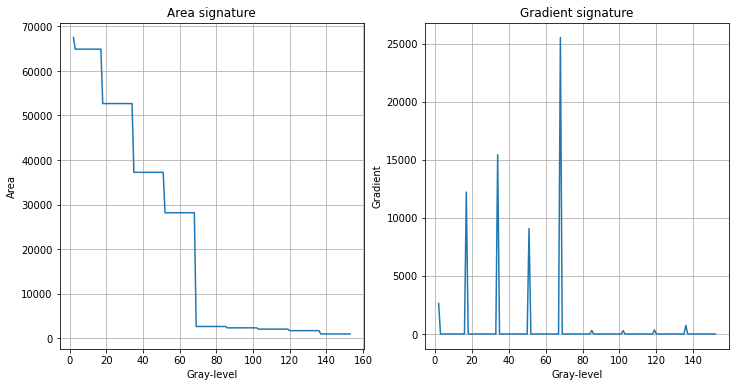

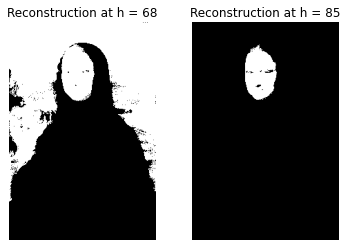

In [11]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("assignment-01/Images/monalisa.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
# plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...
Bc = np.ones((3,3),dtype = bool)
mxt = siamxt.MaxTreeAlpha(img,Bc)
x,y = 45,100
node = mxt.node_index[x,y]
area = mxt.node_array[3,:]
levels,signature =  mxt.getSignature(area, node)
gradient = signature[0:-1] - signature[1:]

# Display area signature
fig = plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(levels,signature)
plt.grid()
plt.xlabel("Gray-level")
plt.ylabel("Area")
plt.title("Area signature")


# Display gradient of the area signature
plt.subplot(122)
plt.grid()
plt.plot(levels[0:-1],gradient)
plt.xlabel("Gray-level")
plt.ylabel("Gradient")
plt.title("Gradient signature")

# Selecting the second peak of the gradient
index = np.argsort(gradient)[::-1][0]

#reconstructing the node corresponding to the peak (largest area)
area1 = signature[index]
node1 = np.where(mxt.node_array[3,:] == area1)[0][0]
cc1 = mxt.recConnectedComponent(node1)

#reconstructing the node corresponding to the peak (smaller area)
area2 = signature[index + 1]
node2 = np.where(mxt.node_array[3,:] == area2)[0][0]
cc2 = mxt.recConnectedComponent(node2)


#Displaying the nodes reconstructed
fig = plt.figure()
plt.subplot(121)
plt.imshow(cc1, cmap='Greys_r')
plt.axis('off')
plt.title("Reconstruction at h = %d" %mxt.node_array[2,node1])
plt.subplot(122)
plt.imshow(cc2, cmap='Greys_r')
plt.axis('off')
plt.title("Reconstruction at h = %d" %mxt.node_array[2,node2])

**Part 2)** Apply a series of filters to this image to segment the carotid arteries wall

(322, 322)


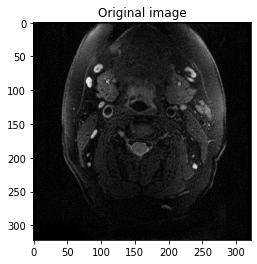

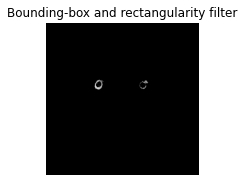

In [13]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("assignment-01/Images/carotid.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
# plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...
#Structuring element with connectivity-9
Bc = np.ones((3,3), dtype = bool)

# Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)

#Compute center of nodes
centers = mxt.computeNodeCentroid()

# Node selection criteria
nodes = (((centers[:, 1] < 112) & (centers[:, 1] >105)) | ((centers[:, 1] < 210) & (centers[:, 1] >200))) & ((centers[:, 0] < 140) & (centers[:, 0] >126))

#Filtering the max-tree
mxt.contractDR(nodes)

# Recovering the filtered the image
img_filtered = mxt.getImage()


#Displaying the filtered image
plt.subplot(122)
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("Bounding-box and rectangularity filter")
plt.show()

**Parte 3)** Apply a series of filters to remove the white artifacts in the image

(320, 213)


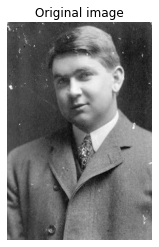

Text(0.5, 1.0, 'area-open, area = 45 ')

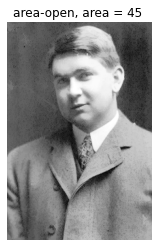

In [16]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("assignment-01/Images/filtering-image.jpg").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...
# Area threshold
area = 45

#Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(img,Bc)


#Applying an area-open filter
mxt.areaOpen(area)

#Recovering the image
img_filtered =  mxt.getImage()

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("area-open, area = %d " %area)

**Part 4)** Apply a series of filters that will remove all objects in the image except for the
two pens

(381, 384)


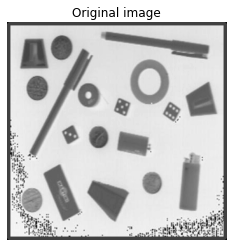

(381, 384)


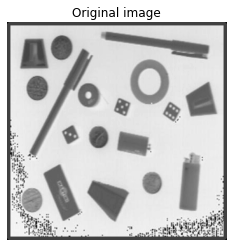

Text(0.5, 1.0, 'area-open, area = 3100 ')

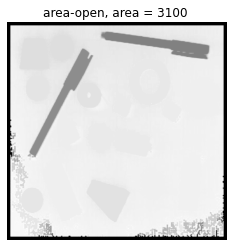

In [5]:
# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("./Images/objects.png").convert("L"))
print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...

#define open area filter
def open_area_filter(area,mxt):
    mxt.areaOpen(area)

#define extinction filter
def extinction_filter(n,mxt):
    area = mxt.node_array[3,:]
    area_ext = mxt.computeExtinctionValues(area,"area")
    mxt.extinctionFilter(area_ext,n)

# Loading the image.
# Make sure the image you read is either uint8 or uint16

print(img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original image")
plt.show()

# Include your solution here...
# Negating the image
img_max = img.max()
img_neg = img.max() - img

#Structuring element with connectivity-8 
Bc = np.zeros((3,3), dtype = bool)
Bc[1,:] = True
Bc[:,1] = True

area=3100

#Building the max-tree of the negated image, i.e. min-tree
mxt = siamxt.MaxTreeAlpha(img_neg,Bc)

#applying open area filter
open_area_filter(area,mxt)

#applying extinction filter
extinction_filter(6,mxt)

#Recovering the image 
img_filtered2 =  mxt.getImage()

# Negating the image back
img_filtered2 = img_max -img_filtered2

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_filtered2, cmap='Greys_r')
plt.axis('off')
plt.title("area-open, area = %d " %area)